In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('pupils.csv')

In [4]:
df.head()

,Name,Age,Country,Height,Weight,Avg Grades,income,house rooms,family persons
0,adar,6,SP,113,30,70,16700,7,6
1,agam,6,GR,172,71,92,9200,5,4
2,avi,7,ISR,143,58,82,12000,3,7
3,dani,7,US,160,70,90,15000,4,4
4,dina,7,ISR,110,26,64,10000,6,8


In [7]:
df[['Name','Age']].head(3)

,Name,Age
0,adar,6
1,agam,6
2,avi,7


In [48]:
df.describe()

,Age,Height,Weight,Avg Grades,income,house rooms,family persons
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,9.433333,137.266667,51.500000,80.500000,20096.666667,4.366667,5.833333
std,2.207875,26.286136,18.104581,7.942683,11943.270601,1.629117,1.743626
min,6.000000,90.000000,26.000000,64.000000,7600.000000,2.000000,3.000000
25%,8.000000,113.500000,34.000000,74.000000,11175.000000,3.000000,4.250000
50%,9.000000,132.000000,53.000000,82.000000,17650.000000,4.500000,6.000000
75%,11.000000,158.000000,65.500000,85.750000,23750.000000,5.750000,7.000000
max,14.000000,192.000000,90.000000,94.000000,54100.000000,7.000000,10.000000


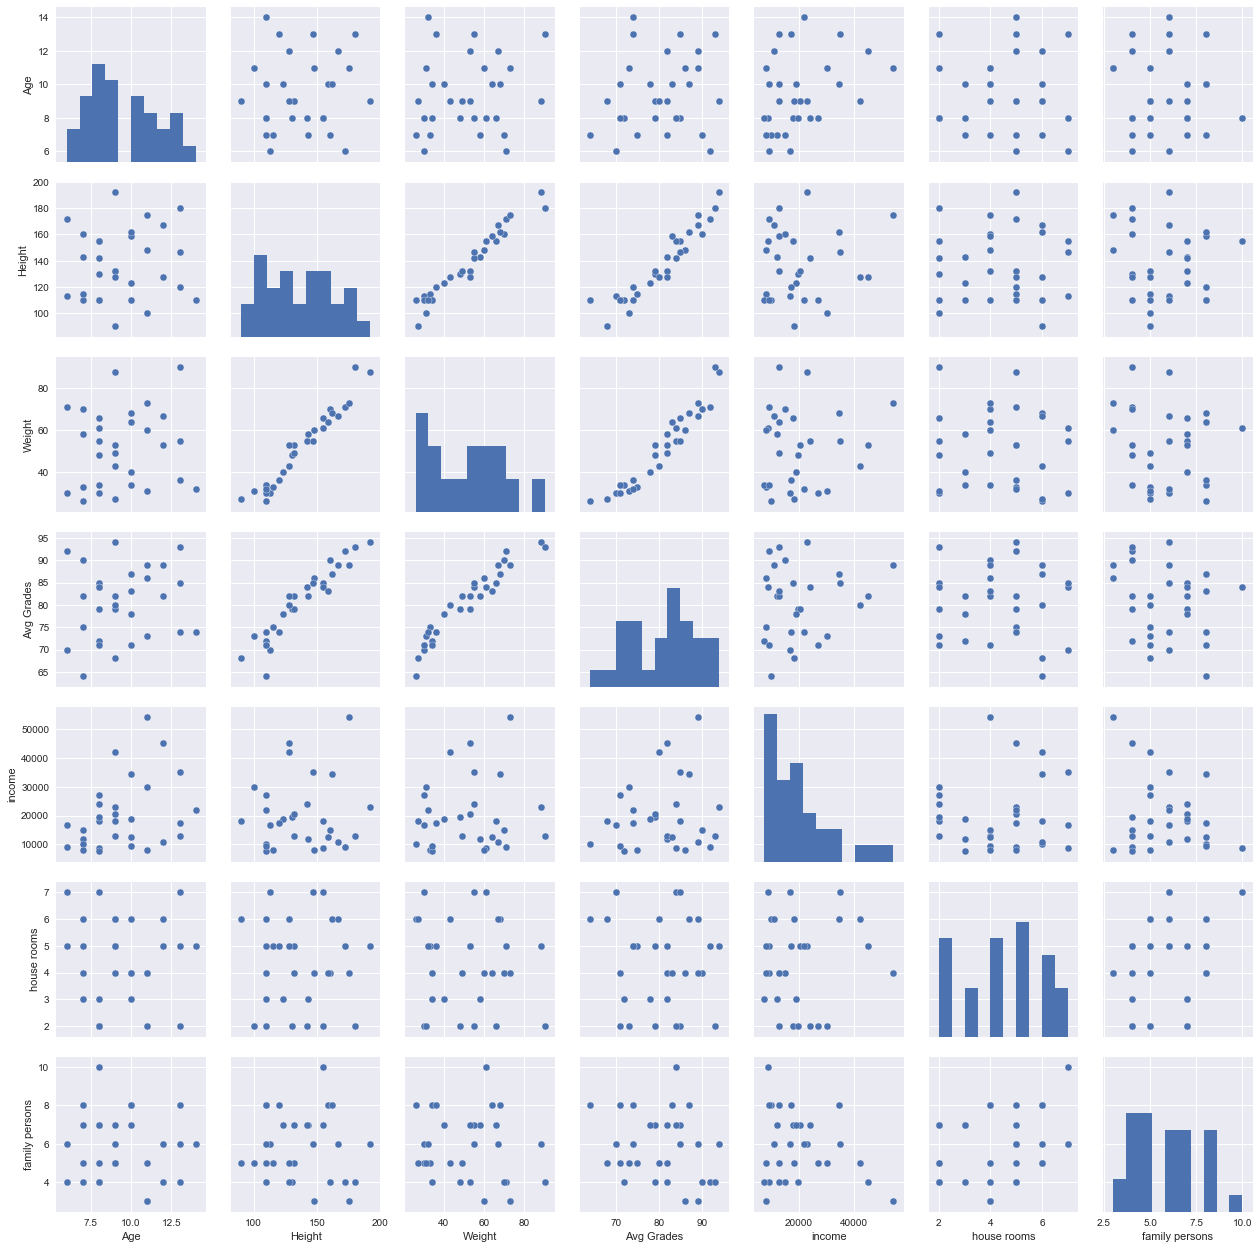

In [49]:
sns.pairplot(df)

In [50]:
import pandas as pd
import numpy as np


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
Name              30 non-null object
Age               30 non-null int64
Country           30 non-null object
Height            30 non-null int64
Weight            30 non-null int64
Avg Grades        30 non-null int64
income            30 non-null int64
house rooms       30 non-null int64
family persons    30 non-null int64
dtypes: int64(7), object(2)
memory usage: 2.2+ KB


In [52]:
df.columns

Index([u'Name', u'Age', u'Country', u'Height', u'Weight', u'Avg Grades',
       u'income', u'house rooms', u'family persons'],
      dtype='object')

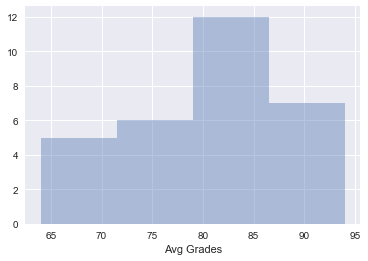

In [54]:
sns.distplot(df['Avg Grades'],kde=False)

In [55]:
# find out correlation between params
df.corr()

,Age,Height,Weight,Avg Grades,income,house rooms,family persons
Age,1.000000,0.074586,0.118616,0.150426,0.344763,0.040584,-0.052251
Height,0.074586,1.000000,0.974416,0.944887,0.079537,0.006496,-0.060690
Weight,0.118616,0.974416,1.000000,0.959074,0.091562,-0.084762,-0.125074
Avg Grades,0.150426,0.944887,0.959074,1.000000,0.145275,-0.065290,-0.212886
income,0.344763,0.079537,0.091562,0.145275,1.000000,0.062980,-0.241287
house rooms,0.040584,0.006496,-0.084762,-0.065290,0.062980,1.000000,0.289322
family persons,-0.052251,-0.060690,-0.125074,-0.212886,-0.241287,0.289322,1.000000


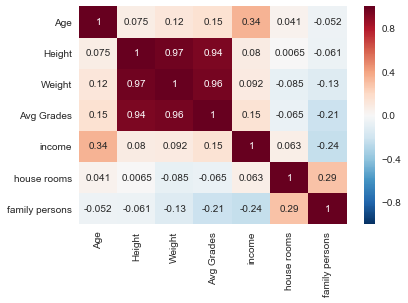

In [56]:
sns.heatmap(df.corr(),annot=True)

Now lets create a list of features as X axis and what we want to predict as y

In [117]:

X = df[['Height', 'Weight',
       'income', 'house rooms','family persons']]

In [118]:
y = df[['Avg Grades']]

We have a data and we want to build a model to predict targets 
We first need to test our model to see if it we give us the correct answers 
The solution is to split the data for example to 65% and 35% , run the model on 65% data, and then test on the 35% and see if the results are close to the real values. 

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
model = LinearRegression()

In [123]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
model.intercept_

array([ 63.28785186])

In [125]:
model.coef_

array([[ -7.19644278e-02,   5.46760425e-01,   1.36990194e-05,
          3.36341048e-01,  -4.49545085e-01]])

In [126]:
X_train.columns

Index([u'Height', u'Weight', u'income', u'house rooms', u'family persons'], dtype='object')

In [127]:
pd.DataFrame(model.coef_.reshape(-1,1),X_train.columns,columns=["Coeff"])

,Coeff
Height,-0.071964
Weight,0.546760
income,0.000014
house rooms,0.336341
family persons,-0.449545


In [128]:
predictions = model.predict(X_test)

In [129]:
predictions

array([[ 79.85279444],
       [ 81.58119956],
       [ 70.56940775],
       [ 98.59254232],
       [ 71.59322786],
       [ 74.42776326],
       [ 72.59860867],
       [ 84.76115611],
       [ 87.70362524]])

Now lets see if the model is ok - we compare the predictions with real results we grabbed from our data

In [106]:
y_test

,Avg Grades
26,85
3,90
27,93
12,94
24,89
9,72
22,73
29,74
5,75
20,78


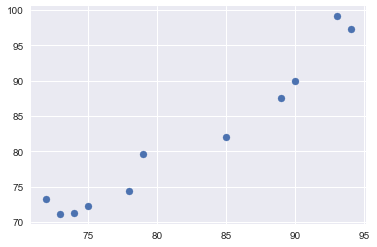

In [89]:
plt.scatter(y_test,predictions)

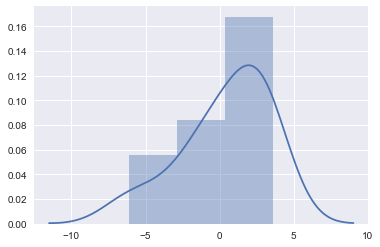

In [90]:
sns.distplot(y_test - predictions)

Now we can use the model to predict avg grade for a given set of features

In [92]:
vals = np.array([100,30,7,3]).reshape(1,-1)
model.predict(vals)

array([[ 71.9137405]])